In [1]:
import graphlab
import matplotlib.pyplot as pt
sales=graphlab.SFrame("home_data.gl/")
sales
graphlab.canvas.set_target("ipynb")

sales.show(view="Scatter Plot",x="sqft_living",y="price")

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1469789927.log


This non-commercial license of GraphLab Create for academic use is assigned to shubhammishra1674@gmail.com and will expire on July 13, 2017.


In [2]:
###Creating Simple_regression_model with sqr_fit_living as independent and price as response
training_data,test_data=sales.random_split(0.8,seed=0)
###Build regression model
sqft_model=graphlab.linear_regression.create(training_data,target='price',features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16549

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 1.107361     | 4344822.645006     | 2268223.195743       | 262528.667902 | 271048.772345   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

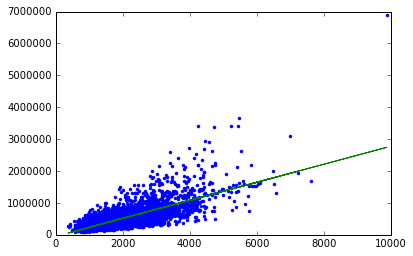

In [3]:
%matplotlib inline
pt.plot(test_data['sqft_living'],test_data['price'],'.',test_data['sqft_living'],sqft_model.predict(test_data),'-')

In [4]:
features12=['zipcode','bedrooms','bathrooms','floors','sqft_living','sqft_lot']
sales.show(view='BoxWhisker Plot',x='zipcode',y='price')


In [5]:
my_feature_list=graphlab.linear_regression.create(training_data,target="price",features=features12)
print sqft_model.evaluate(test_data)
print my_feature_list.evaluate(test_data)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16513

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 115

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.067833     | 3730372.176804     | 1518566.721920       | 182997.440348 | 161651.668877   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

{'max_error': 4139782.0701002926, 'rmse': 255195.2215810204}
{'max_error': 3448118.860087563, 'rmse': 179416.31681468635}


In [6]:
house=sales[sales['id']=='2414600126']

In [7]:
print sqft_model.predict(house)
print my_feature_list.predict(house)

[455046.19956880715]
[433327.082168565]
